In [1]:
import numpy as np 
from keras.models import * 
from keras.layers import * 
from keras.optimizers import * 
from keras.datasets import mnist 
import keras.backend as K 
import matplotlib.pyplot as plt 
from DCGAN import *
import time

K.set_image_data_format('channels_last') 

Using TensorFlow backend.


In [2]:
#x_train, x_test, y_train, y_test = np.load('binary_image_data.npy')
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1).astype('float32')
x_train = (x_train -127.5) / 127.5 
print(x_train.shape) 

(60000, 28, 28, 1)


In [3]:
# Init network 
gan = Gan(x_train) 

input_shape:  (28, 28, 1) 

Discriminator 

Generator 

AM 



Generator 



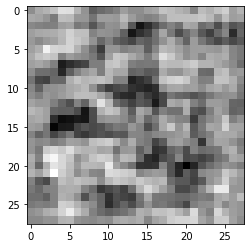

In [4]:
generator = gan.create_g()
noise = np.random.uniform(-1.0, 1.0, size=[1,100])
generated_image = generator.predict(noise)
plt.imshow(generated_image.reshape((28,28)), cmap='gray')

In [6]:
discriminator = gan.create_d()
decision = discriminator.predict(generated_image)
print (decision)

gan.create_d().predict(imgs)

Discriminator 

[[0.5000943]]


In [8]:
# Some parameters. 
epochs = 1 
sample_size = 10 
batch_size = 100
train_per_epoch = x_train.shape[0] // batch_size
history=[]


for epoch in range(0, epochs): 
    start_time = time.time()
    total_d_loss = 0.0 
    total_a_loss = 0.0 
    
    for batch in range(0, train_per_epoch): 
        d_loss, a_loss, imgs = gan.train(batch_size) 
        total_d_loss += d_loss 
        total_a_loss += a_loss 
        
    total_d_loss /= train_per_epoch 
    total_a_loss /= train_per_epoch
    
    recode =(epoch, total_d_loss, total_a_loss)
    history.append(recode)

    print("Epoch : {}, elapsed : {}, D Loss: {}, AM Loss: {}".format(epoch + 1, time.time() - start_time, total_d_loss, total_a_loss)) 
    
    fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1)) 
    
    for i in range(0, sample_size): 
        ax[i].set_axis_off() 
        ax[i].imshow(imgs[i].reshape((gan.img_rows, gan.img_cols)), interpolation='nearest')
    plt.show() 
    plt.close(fig)

    gan.save()

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
from pandas import Series, DataFrame 

df = DataFrame(history, columns=['epoch', 'total_d_loss', 'total_a_loss'])

df.plot(y=['d_loss', 'a_loss'])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()